In [154]:
import pandas as pd

#Filtering dataset and arranging into columns of Sanskrit and English

with open("data/geeta.txt", "r", encoding="utf-8") as file:
    lines = [line.strip() for line in file if line.strip()]  

# Separate Sanskrit and English lines
sanskrit_lines = lines[0::2]  # Sanskrit in even indexes
english_lines = lines[1::2]   # English in odd indexes

# Ensure both lists have the same length

min_length = min(len(sanskrit_lines), len(english_lines))
sanskrit_lines = sanskrit_lines[:min_length]
english_lines = english_lines[:min_length]

# Create DataFrame
df = pd.DataFrame({"Sanskrit": sanskrit_lines, "English": english_lines})

df.head(5)

,Sanskrit,English
0,वैशम्पायन उवाच अथ गावल्गणिविद्वान् संयुगादेत्य...,"Vaishampayana said O descendant of Bharata, po..."
1,संजय उवाच संजयोऽहं महाराज नमस्ते भरतर्षभ। हतो ...,"Sanjaya said O great king, I am Sanjaya , O fo..."
2,ककुदं सर्वयोधानां धाम सर्वधनुष्मताम्। शरतल्पगत...,"The foremost of all warriors, that prowess per..."
3,यस्य वीर्यं समाश्रित्य द्यूतं पुत्रस्तवाकरोत्।...,"O king, relaying on whose energy, your son pla..."
4,यः सर्वान् पृथिवीपालान् समवेतान् महामृधे। जिगा...,That mighty car-warrior who on a single car ha...


In [155]:
df.tail(5)

,Sanskrit,English
955,संजय उवाच इत्यहं वासुदेवस्य पार्थस्य च महात्मन...,"Sanjay said O king, I heard this wonderful and..."
956,व्यासप्रसादाच्छ्रुतवानेतद् गुह्यमहं परम्। योगय...,"Through the favour of Vyasa, I myself heard th..."
957,राजन् संस्मृत्य संस्मृत्य संवादमिममद्भुतम्। के...,"O king, I am feeling more and more pleasure as..."
958,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः। व...,"O king, I am feeling more and more pleasure as..."
959,यत्र योगेश्वरः कृष्णो यत्र पार्थो धनुर्धरः। तत...,Wherever exist the Lord of Yoga Srikrishna and...


In [156]:
#Lowecasing sentences of english so that it can be used for training
df['English'] = df['English'].str.lower()

In [157]:
df.head(4)

,Sanskrit,English
0,वैशम्पायन उवाच अथ गावल्गणिविद्वान् संयुगादेत्य...,"vaishampayana said o descendant of bharata, po..."
1,संजय उवाच संजयोऽहं महाराज नमस्ते भरतर्षभ। हतो ...,"sanjaya said o great king, i am sanjaya , o fo..."
2,ककुदं सर्वयोधानां धाम सर्वधनुष्मताम्। शरतल्पगत...,"the foremost of all warriors, that prowess per..."
3,यस्य वीर्यं समाश्रित्य द्यूतं पुत्रस्तवाकरोत्।...,"o king, relaying on whose energy, your son pla..."


In [158]:
#For encoder and decoder model we need to add start and end tokens to the target sentences (sanskrit)
df['English'] = df['English'].apply(lambda x: 'start_ ' + x + ' _end')


In [159]:
df.head(4)

,Sanskrit,English
0,वैशम्पायन उवाच अथ गावल्गणिविद्वान् संयुगादेत्य...,start_ vaishampayana said o descendant of bhar...
1,संजय उवाच संजयोऽहं महाराज नमस्ते भरतर्षभ। हतो ...,"start_ sanjaya said o great king, i am sanjaya..."
2,ककुदं सर्वयोधानां धाम सर्वधनुष्मताम्। शरतल्पगत...,"start_ the foremost of all warriors, that prow..."
3,यस्य वीर्यं समाश्रित्य द्यूतं पुत्रस्तवाकरोत्।...,"start_ o king, relaying on whose energy, your ..."


In [160]:
#Get the english and sanskrit vocabulary
all_eng_words=set()
for eng in df['English']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_san_words=set()
for sanskrit in df['Sanskrit']:
    for word in sanskrit.split():
        if word not in all_san_words:
            all_san_words.add(word)
print(len(all_eng_words))
print(len(all_san_words))

4926
6305


In [161]:
df.head(1000)

,Sanskrit,English
0,वैशम्पायन उवाच अथ गावल्गणिविद्वान् संयुगादेत्य...,start_ vaishampayana said o descendant of bhar...
1,संजय उवाच संजयोऽहं महाराज नमस्ते भरतर्षभ। हतो ...,"start_ sanjaya said o great king, i am sanjaya..."
2,ककुदं सर्वयोधानां धाम सर्वधनुष्मताम्। शरतल्पगत...,"start_ the foremost of all warriors, that prow..."
3,यस्य वीर्यं समाश्रित्य द्यूतं पुत्रस्तवाकरोत्।...,"start_ o king, relaying on whose energy, your ..."
4,यः सर्वान् पृथिवीपालान् समवेतान् महामृधे। जिगा...,start_ that mighty car-warrior who on a single...
...,...,...
955,संजय उवाच इत्यहं वासुदेवस्य पार्थस्य च महात्मन...,"start_ sanjay said o king, i heard this wonder..."
956,व्यासप्रसादाच्छ्रुतवानेतद् गुह्यमहं परम्। योगय...,"start_ through the favour of vyasa, i myself h..."
957,राजन् संस्मृत्य संस्मृत्य संवादमिममद्भुतम्। के...,"start_ o king, i am feeling more and more plea..."
958,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः। व...,"start_ o king, i am feeling more and more plea..."


In [162]:
df['length_san_sentence']=df['Sanskrit'].apply(lambda x:len(x.split(" ")))
df['length_eng_sentence']=df['English'].apply(lambda x:len(x.split(" ")))

In [163]:
df.head(4)

,Sanskrit,English,length_san_sentence,length_eng_sentence
0,वैशम्पायन उवाच अथ गावल्गणिविद्वान् संयुगादेत्य...,start_ vaishampayana said o descendant of bhar...,18,62
1,संजय उवाच संजयोऽहं महाराज नमस्ते भरतर्षभ। हतो ...,"start_ sanjaya said o great king, i am sanjaya...",11,33
2,ककुदं सर्वयोधानां धाम सर्वधनुष्मताम्। शरतल्पगत...,"start_ the foremost of all warriors, that prow...",8,25
3,यस्य वीर्यं समाश्रित्य द्यूतं पुत्रस्तवाकरोत्।...,"start_ o king, relaying on whose energy, your ...",11,29


In [164]:
df[df['length_san_sentence']>30].shape

(5, 4)

In [165]:
df=df[df['length_san_sentence']<=20]
df=df[df['length_eng_sentence']<=20]

In [166]:
df.shape

(71, 4)

In [167]:
print("maximum length of English Sentence ",max(df['length_eng_sentence']))
print("maximum length of Sanskrit Sentence ",max(df['length_san_sentence']))

maximum length of English Sentence  20
maximum length of Sanskrit Sentence  12


In [168]:
max_length_tar=max(df['length_eng_sentence'])
max_length_scr=max(df['length_san_sentence'])

In [169]:
# Fix for DataFrame error - directly use the sorted sets
input_words = sorted(list(all_san_words))
target_words = sorted(list(all_eng_words))
num_encoder_tokens = len(all_san_words)
num_decoder_tokens = len(all_eng_words)
print(num_encoder_tokens, num_decoder_tokens)

6305 4926


In [170]:
num_decoder_tokens += 1 #for zero padding

In [171]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [172]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head(10)

,Sanskrit,English,length_san_sentence,length_eng_sentence
25,कृपे संनिहिते तत्र भरद्वाजात्मजे तथा। भीष्मः प...,"start_ when kripa was near him, when drona was...",12,20
611,यथाऽऽकाशस्थितो नित्यं वायुः सर्वत्रगो महान्। त...,start_ as the great and ubiquitous atmosphere ...,9,20
562,त्रिभिर्गुणमयैर्भावैरेभिः सर्वमिदं जगत्। मोहित...,"start_ this whole universe, deluded by these t...",7,20
282,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान्। पुरु...,"start_ there are dhrishtaketu, chekitan and va...",7,19
338,अविनाशि तु तद् विद्धि येन सर्वमिदं ततम्। विनाश...,"start_ know, that which pervades all this (uni...",11,17
300,संजय उवाच एवमुक्तो हृषीकेशो गुडाकेशेन भारत। से...,"start_ sanjaya said o bharata, thus addressed ...",9,20
889,नियतस्य तु संन्यासः कर्मणो नोपपद्यते। मोहात् त...,start_ the renunciation of work is not proper....,9,19
896,अधिष्ठान तथा कर्ता करणं च पृथग्विधम्। विविधाश्...,"start_ substratum (body), agency (mind). organ...",11,19
331,तमुवाच हृषीकेशः प्रहसन्निव भारत। सेनयोरुभयोर्म...,"start_ to him, who overcome with despondency i...",7,19
182,पृष्ठतोऽप्यर्जुनस्यासीद् युयुधानो महाबलः। चक्र...,start_ behind arjuna stood the mighty yuyudhan...,7,19


In [173]:
from sklearn.model_selection import train_test_split
X, y = df['Sanskrit'], df['English']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((56,), (15,))

In [174]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [175]:
import numpy as np
import tensorflow as tf

# Create tf.data.Dataset for training
def create_dataset(X, y, batch_size):
    def generator():
        for input_text, target_text in zip(X, y):
            encoder_input = np.zeros((max_length_scr,), dtype='float32')
            decoder_input = np.zeros((max_length_tar,), dtype='float32')
            decoder_target = np.zeros((max_length_tar, num_decoder_tokens), dtype='float32')
            
            for t, word in enumerate(input_text.split()):
                if t < max_length_scr:
                    encoder_input[t] = input_token_index[word]
                    
            for t, word in enumerate(target_text.split()):
                if t < max_length_tar-1:
                    decoder_input[t] = target_token_index[word]
                if t > 0 and t < max_length_tar:
                    decoder_target[t-1, target_token_index[word]] = 1.
                    
            yield (encoder_input, decoder_input), decoder_target
            
    return tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            (tf.TensorSpec(shape=(max_length_scr,), dtype=tf.float32),
             tf.TensorSpec(shape=(max_length_tar,), dtype=tf.float32)),
            tf.TensorSpec(shape=(max_length_tar, num_decoder_tokens), dtype=tf.float32)
        )
    ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create training and validation datasets
train_dataset = create_dataset(X_train, y_train, batch_size)
val_dataset = create_dataset(X_test, y_test, batch_size)


In [176]:
latent_dim=300

In [177]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

# Build the encoder-decoder model using functional API
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(num_encoder_tokens, latent_dim, mask_zero=True)(encoder_inputs)
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(enc_emb)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
dec_emb = Embedding(num_decoder_tokens, latent_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add early stopping and model checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

epochs = 10

# Train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint]
)




Epoch 1/10
      1/Unknown 1s 1s/step - accuracy: 0.0000e+00 - loss: 8.1578

2025-02-08 00:06:44.127802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:44.127826: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17539563861557551380
2025-02-08 00:06:44.127830: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:44.127833: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11715653802125436828
2025-02-08 00:06:44.127838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_8/_44]]
2025-02-08 00:06:44.127842: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17199256

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 8.1578 - val_accuracy: 0.0067 - val_loss: 8.2180
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.0295 - loss: 8.1532

2025-02-08 00:06:44.700102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:44.700118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4223293519009927616
2025-02-08 00:06:44.700121: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:44.700125: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17285039310168618366
2025-02-08 00:06:44.700131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14465671068993926592
2025-02-08 00:06:44.700135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.0295 - loss: 8.1532 - val_accuracy: 0.0433 - val_loss: 8.2155
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0759 - loss: 8.1477

2025-02-08 00:06:44.943580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:44.943597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_2/_50]]
2025-02-08 00:06:44.943603: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 7307922332006645929
2025-02-08 00:06:44.943607: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13190989692348483283
2025-02-08 00:06:44.943611: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12933595445572208973
2025-02-08 00:06:44.943614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 256525947

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.0759 - loss: 8.1477 - val_accuracy: 0.0633 - val_loss: 8.2117
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0946 - loss: 8.1400

2025-02-08 00:06:45.170682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:45.170700: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4223293519009927616
2025-02-08 00:06:45.170703: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:45.170737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_5_1/embedding_10_1/SelectV2/_94]]
2025-02-08 00:06:45.170765: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17539563861557551380
2025-02-08 00:06:45.170797: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item ca

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.0946 - loss: 8.1400 - val_accuracy: 0.0667 - val_loss: 8.2050
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0946 - loss: 8.1270

2025-02-08 00:06:45.385920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:45.385936: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:45.385940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_6/_46]]
2025-02-08 00:06:45.385945: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17199256547861931027
2025-02-08 00:06:45.385948: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2759265522867758367
2025-02-08 00:06:45.385952: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 131909896

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.0946 - loss: 8.1270 - val_accuracy: 0.0667 - val_loss: 8.1916
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0911 - loss: 8.1021

2025-02-08 00:06:45.623598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:45.623617: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17539563861557551380
2025-02-08 00:06:45.623622: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:45.623626: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11715653802125436828
2025-02-08 00:06:45.623630: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15999532124967242306
2025-02-08 00:06:45.623633: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15160633193658952534
2025-02-08 00:06:45.623637: I tensorflow/core/framework/local_rend

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.0911 - loss: 8.1021 - val_accuracy: 0.0533 - val_loss: 8.1633
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0714 - loss: 8.0497

2025-02-08 00:06:45.827109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:45.827123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_26]]
2025-02-08 00:06:45.827132: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17539563861557551380
2025-02-08 00:06:45.827143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17199256547861931027
2025-02-08 00:06:45.827150: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:45.827165: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11715653802125436828
2025-0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.0714 - loss: 8.0497 - val_accuracy: 0.0333 - val_loss: 8.1012
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.0500 - loss: 7.9349

2025-02-08 00:06:46.053580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:46.053609: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 598143700032961860
2025-02-08 00:06:46.053619: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17539563861557551380
2025-02-08 00:06:46.053623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/Add_18/_42]]
2025-02-08 00:06:46.053638: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:46.053648: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 171992565

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.0500 - loss: 7.9349 - val_accuracy: 0.0333 - val_loss: 7.9766
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0473 - loss: 7.7126

2025-02-08 00:06:46.247553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:46.247581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_5_1/embedding_11_1/SelectV2/_102]]
2025-02-08 00:06:46.247587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4223293519009927616
2025-02-08 00:06:46.247591: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:46.247594: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15114978044230816752
2025-02-08 00:06:46.247598: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.0473 - loss: 7.7126 - val_accuracy: 0.0367 - val_loss: 7.7932
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0429 - loss: 7.3936

2025-02-08 00:06:46.468519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-02-08 00:06:46.468539: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15057625658211566130
2025-02-08 00:06:46.468543: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18199888667090228292
2025-02-08 00:06:46.468547: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17285039310168618366
2025-02-08 00:06:46.468550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_5_1/embedding_11_1/SelectV2/_102]]
2025-02-08 00:06:46.468563: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.0429 - loss: 7.3936 - val_accuracy: 0.0333 - val_loss: 7.6046


In [180]:

# Save the model
model.save('sanskrit_english_translator.h5')

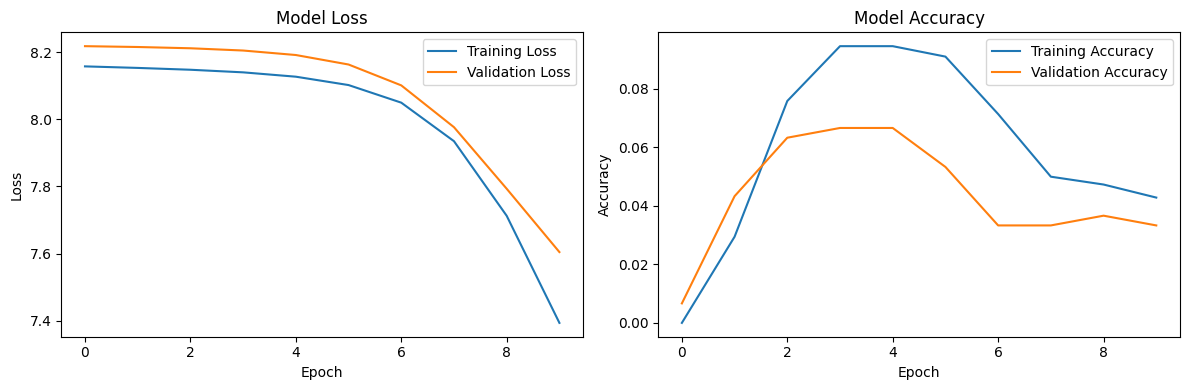

In [181]:
# Optional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()